In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


# from google.colab import files     #colab 돌릴때
# uploaded = files.upload()          #colab 돌릴때

In [ ]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [ ]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [ ]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [ ]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


In [ ]:
wine[wine.quality ==3].head()# 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [ ]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [ ]:
white_quality = wine.loc[wine.type==1, 'quality']


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


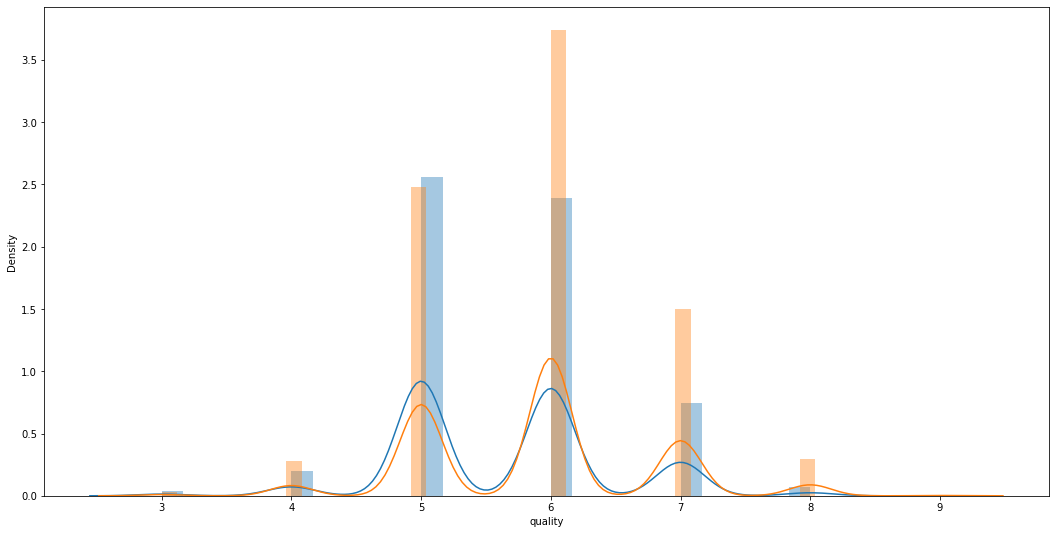

In [ ]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

In [ ]:
wine["new_1_quality"] = wine.quality

In [ ]:
wine["new_2_quality"] = wine.quality

In [ ]:
wine.loc[wine.new_1_quality ==9, 'new_1_quality'] = 8

In [ ]:
wine.loc[wine.new_2_quality ==9, 'new_2_quality'] = 8
wine.loc[wine.new_2_quality ==3, 'new_2_quality'] = 4

In [ ]:
wine
wine.new_1_quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     198
3      30
Name: new_1_quality, dtype: int64

In [ ]:
wine
wine.new_2_quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     246
8     198
Name: new_2_quality, dtype: int64

In [ ]:
red_1_quality = wine.loc[wine.type == 0, 'new_1_quality']
red_2_quality = wine.loc[wine.type == 0, 'new_2_quality']

In [ ]:
white_1_quality = wine.loc[wine.type==1, 'new_1_quality']
white_2_quality = wine.loc[wine.type==1, 'new_2_quality']


### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [ ]:
import statsmodels.api as sm

In [ ]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [ ]:
tstat_1, pvalue_1, df_1 = sm.stats.ttest_ind(red_1_quality, white_1_quality)

In [ ]:
tstat_2, pvalue_2, df_2 = sm.stats.ttest_ind(red_2_quality, white_2_quality)

In [ ]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


In [ ]:
print("T값은 %.5f, p-value는 %.8f"%(tstat_1, pvalue_1))

T값은 -9.67078, p-value는 0.00000000


In [ ]:
print("T값은 %.5f, p-value는 %.8f"%(tstat_2, pvalue_2))

T값은 -9.72269, p-value는 0.00000000


### 상관관계분석

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_1_quality,new_2_quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740,-0.077091,-0.075557
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036,-0.266198,-0.264246
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397,0.085354,0.085193
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821,-0.036835,-0.037710
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678,-0.200489,-0.200158
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644,0.055471,0.058905
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357,-0.041502,-0.041502
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645,-0.305735,-0.308269
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129,0.019067,0.020652
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218,0.038978,0.038639


<AxesSubplot:>

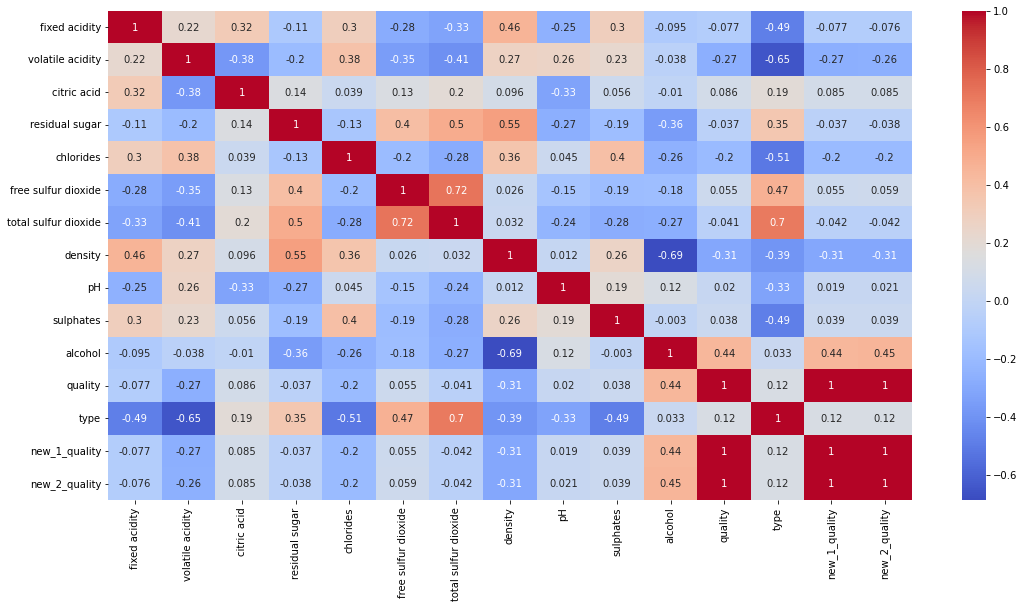

In [ ]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [ ]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [ ]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
new_2_quality           0.996562
new_1_quality           0.999498
quality                 1.000000
dtype: float64

In [ ]:
wine.corrwith(wine.new_1_quality).sort_values()

density                -0.305735
volatile acidity       -0.266198
chlorides              -0.200489
fixed acidity          -0.077091
total sulfur dioxide   -0.041502
residual sugar         -0.036835
pH                      0.019067
sulphates               0.038978
free sulfur dioxide     0.055471
citric acid             0.085354
type                    0.119143
alcohol                 0.444275
new_2_quality           0.997028
quality                 0.999498
new_1_quality           1.000000
dtype: float64

In [ ]:
wine.corrwith(wine.new_2_quality).sort_values()

density                -0.308269
volatile acidity       -0.264246
chlorides              -0.200158
fixed acidity          -0.075557
total sulfur dioxide   -0.041502
residual sugar         -0.037710
pH                      0.020652
sulphates               0.038639
free sulfur dioxide     0.058905
citric acid             0.085193
type                    0.119773
alcohol                 0.449439
quality                 0.996562
new_1_quality           0.997028
new_2_quality           1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [ ]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [ ]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [ ]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 15)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_1_quality,new_2_quality
1394,6.4,0.570,0.14,3.9,0.070,27.0,73.0,0.99669,3.32,0.48,9.2,5,0,5,5
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,6,0,6,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6,0,6,6
288,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7,0,7,7
1121,6.6,0.500,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6,0,6,6


In [ ]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 15)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_1_quality,new_2_quality
3073,6.9,0.25,0.24,3.6,0.057,13.0,85.0,0.99420,2.99,0.48,9.5,4,1,4,4
4436,7.3,0.26,0.30,9.3,0.050,35.0,154.0,0.99581,3.21,0.50,10.4,6,1,6,6
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,6,6
5100,6.7,0.24,0.36,8.4,0.042,42.0,123.0,0.99473,3.34,0.52,10.9,6,1,6,6
4302,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,1,5,5


In [ ]:
wine_sample = pd.concat([red_sample, white_sample])

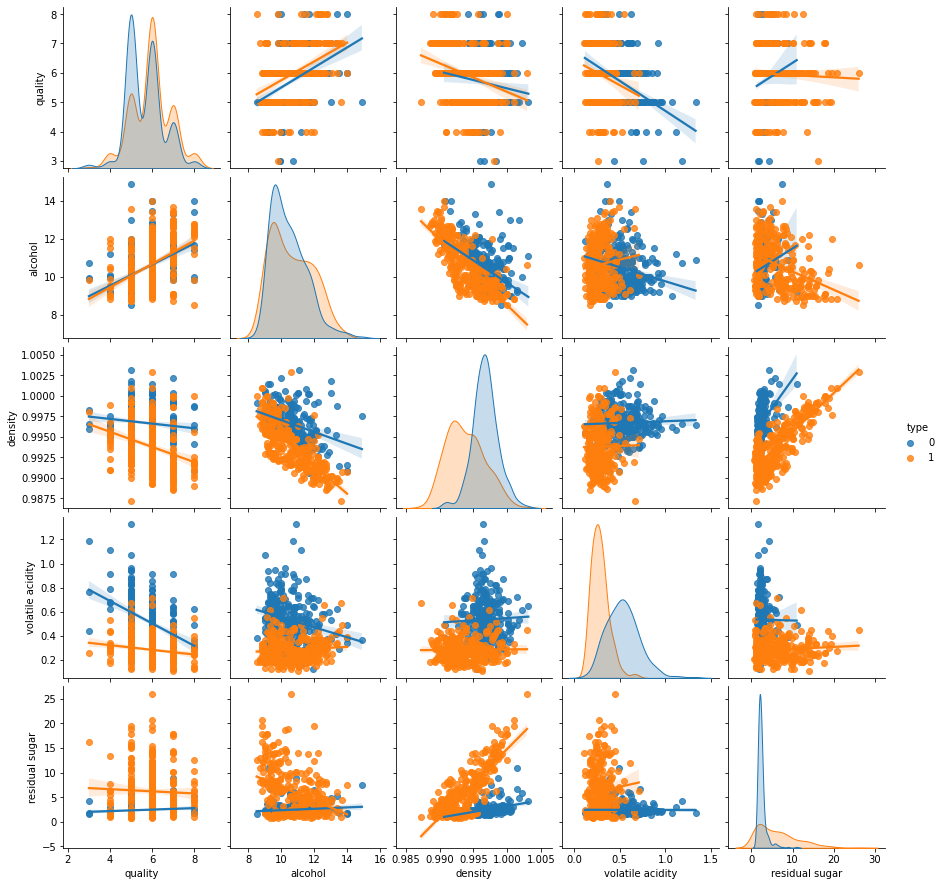

In [ ]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

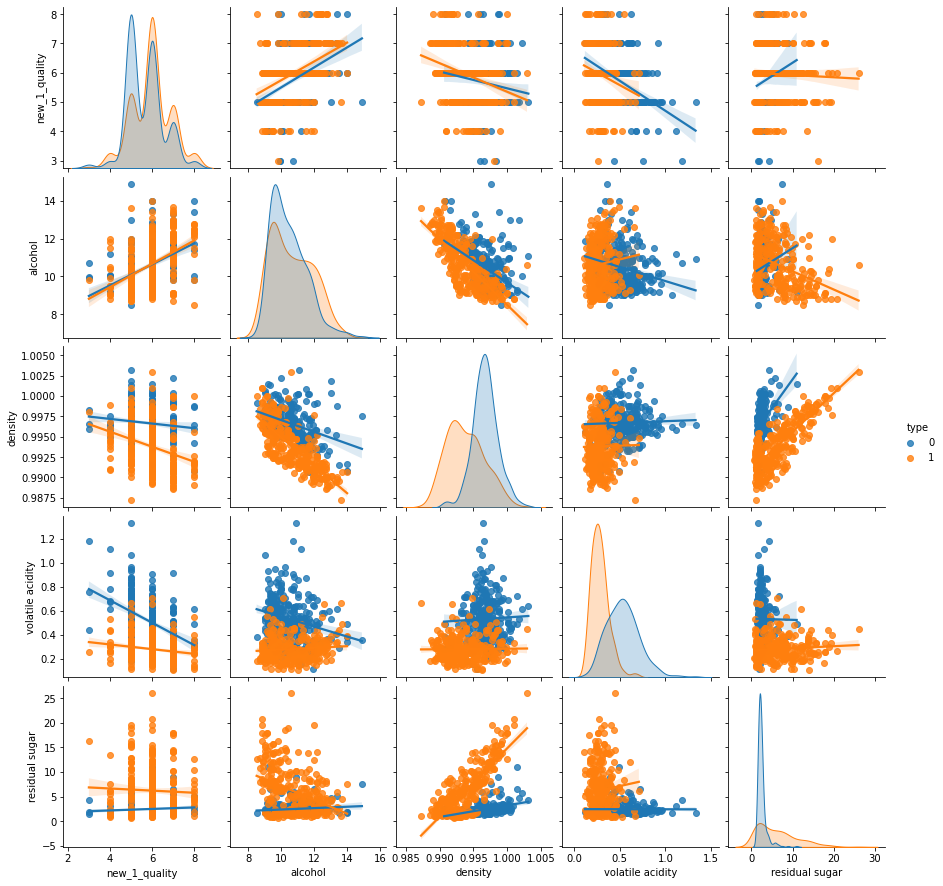

In [ ]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['new_1_quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

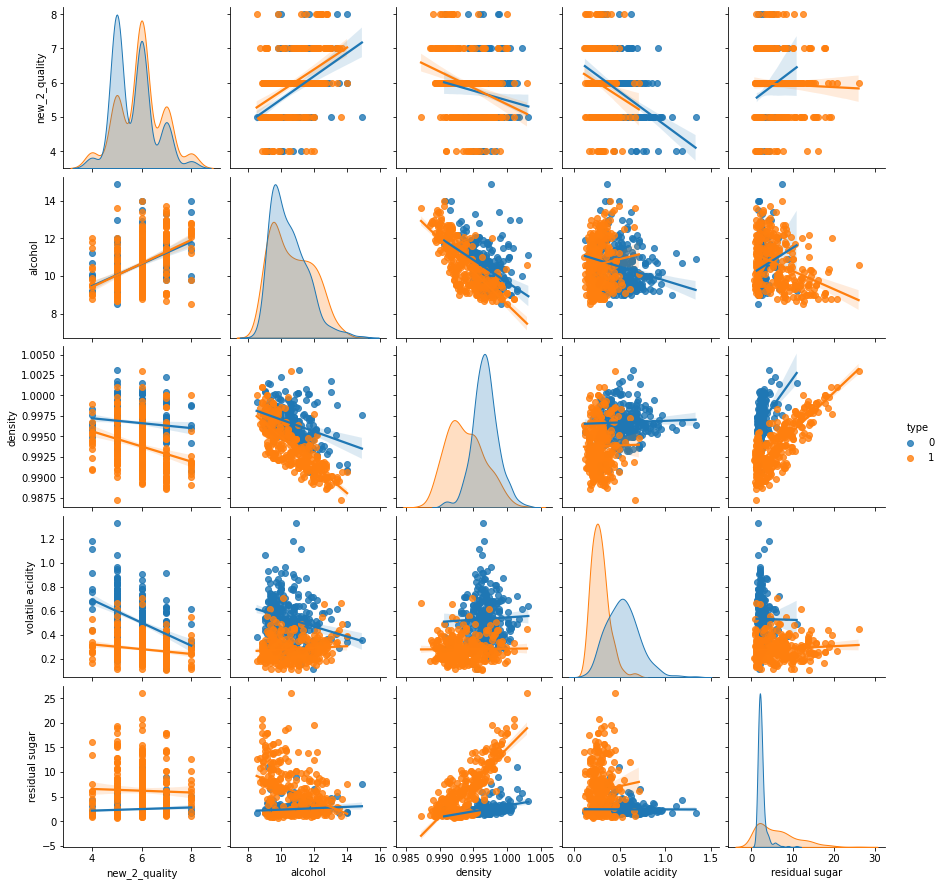

In [ ]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['new_2_quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [ ]:
wine.columns = wine.columns.str.replace(' ','_')

In [ ]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'new_1_quality',
       'new_2_quality'],
      dtype='object')

In [ ]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [ ]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [ ]:
# features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [ ]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [ ]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [ ]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [ ]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [ ]:
# features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [ ]:
# features_Z = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates', 'citric_acid']

In [ ]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [ ]:
y = wine.quality
X = wine[wine.columns.difference(['new_1_quality', 'type'])]
X_1_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_1_standard = pd.concat([X_1_standard, wine.new_1_quality, wine.type], axis=1)

In [ ]:
y = wine.quality
X = wine[wine.columns.difference(['new_2_quality', 'type'])]
X_2_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_2_standard = pd.concat([X_2_standard, wine.new_2_quality, wine.type], axis=1)

In [ ]:
X = wine_standard[features]

In [ ]:
X = wine_1_standard[features]

In [ ]:
X = wine_2_standard[features]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [ ]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)


In [ ]:
X_1_train, X_1_test, y_1_train, y_test = train_test_split(X, wine.new_1_quality, train_size=0.8, random_state=31)
# test 값은 앞의 기본 퀄리티 값을 사용해야함

In [ ]:
X_2_train, X_2_test, y_2_train, y_test = train_test_split(X, wine.new_2_quality, train_size=0.8, random_state=31)
# test 값은 앞의 기본 퀄리티 값을 사용해야함

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
print(X_1_train.shape)
print(X_test.shape)
print(y_1_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
print(X_2_train.shape)
print(X_test.shape)
print(y_2_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
# 모델정의


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_2 = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_1.fit(X_1_train, y_1_train)

LinearRegression()

In [ ]:
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction_1 = model_1.predict(X_test)

In [ ]:
prediction_2 = model_2.predict(X_test)

In [ ]:
prediction

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [ ]:
prediction_1

array([5.61127283, 5.62584937, 6.17209277, ..., 5.29586503, 6.04999882,
       5.41086071])

In [ ]:
prediction_2

array([5.60496324, 5.62985247, 6.17990426, ..., 5.3095635 , 6.05827905,
       5.41602511])

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, prediction)

0.5503884966190934

In [ ]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.47907035729210357

In [ ]:
metrics.mean_absolute_error(y_test, prediction_1)

0.5503808777475875

In [ ]:
metrics.mean_squared_error(y_test, prediction_1)                 #  오류율이 낮아야 좋은 모델    

0.4790172454145584

In [ ]:
metrics.mean_absolute_error(y_test, prediction_2)

0.5508580410561396

In [ ]:
metrics.mean_squared_error(y_test, prediction_2)                 #  오류율이 낮아야 좋은 모델    

0.47897287133391814

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
test_model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = 30, 
                                  max_features =0.3,
                                  random_state=31,
                                  n_jobs=-1)

In [ ]:
cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.39220476, -0.40257215, -0.37961541, -0.41337018, -0.3527764 ,
       -0.28624806, -0.3342923 , -0.40880461, -0.42252336, -0.40312203])

In [ ]:
test_1_model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = 30, 
                                  max_features =0.3,
                                  random_state=31,
                                  n_jobs=-1)

In [ ]:
cross_val_score(test_1_model, X_1_train, y_1_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.39578985, -0.39247134, -0.37722693, -0.40136937, -0.34794677,
       -0.28807612, -0.33795289, -0.40589938, -0.40613721, -0.39477723])

In [ ]:
test_2_model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = 30, 
                                  max_features =0.3,
                                  random_state=31,
                                  n_jobs=-1)

In [ ]:
cross_val_score(test_2_model, X_2_train, y_2_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.37528289, -0.37252302, -0.35488735, -0.37795758, -0.35003631,
       -0.27296205, -0.32251499, -0.37922641, -0.39394127, -0.36881848])

# 하이퍼 파라메터 시작...


In [ ]:
from tqdm import tqdm

hyper_result =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(50)):
    a = np.random.randint(30,70)
    b = np.random.uniform(0.2,0.9)
    model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

    hyper_result.append({'점수' : score,
                         'n_estimators' : 300,
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score))


  2%|▏         | 1/50 [00:09<07:48,  9.55s/it]

현재 스코어는 -0.37686


  4%|▍         | 2/50 [00:18<07:19,  9.15s/it]

현재 스코어는 -0.37577


  6%|▌         | 3/50 [00:29<07:55, 10.13s/it]

현재 스코어는 -0.37929


  8%|▊         | 4/50 [00:41<08:08, 10.61s/it]

현재 스코어는 -0.37929


 10%|█         | 5/50 [00:50<07:34, 10.10s/it]

현재 스코어는 -0.37696


 12%|█▏        | 6/50 [00:59<07:16,  9.92s/it]

현재 스코어는 -0.37696


 14%|█▍        | 7/50 [01:08<06:48,  9.49s/it]

현재 스코어는 -0.37515


 16%|█▌        | 8/50 [01:20<07:11, 10.27s/it]

현재 스코어는 -0.38247


 18%|█▊        | 9/50 [01:30<06:54, 10.11s/it]

현재 스코어는 -0.37741


 20%|██        | 10/50 [01:40<06:53, 10.34s/it]

현재 스코어는 -0.37819


 22%|██▏       | 11/50 [01:52<06:55, 10.65s/it]

현재 스코어는 -0.37927


 24%|██▍       | 12/50 [02:03<06:54, 10.92s/it]

현재 스코어는 -0.37929


 26%|██▌       | 13/50 [02:12<06:13, 10.09s/it]

현재 스코어는 -0.37577


 28%|██▊       | 14/50 [02:20<05:49,  9.70s/it]

현재 스코어는 -0.37515


 30%|███       | 15/50 [02:31<05:50, 10.02s/it]

현재 스코어는 -0.37819


 32%|███▏      | 16/50 [02:42<05:52, 10.37s/it]

현재 스코어는 -0.37819


 34%|███▍      | 17/50 [02:51<05:29,  9.98s/it]

현재 스코어는 -0.37579


 36%|███▌      | 18/50 [03:03<05:34, 10.46s/it]

현재 스코어는 -0.37810


 38%|███▊      | 19/50 [03:14<05:28, 10.58s/it]

현재 스코어는 -0.37741


 40%|████      | 20/50 [03:25<05:22, 10.76s/it]

현재 스코어는 -0.37686


 42%|████▏     | 21/50 [03:36<05:14, 10.83s/it]

현재 스코어는 -0.37741


 44%|████▍     | 22/50 [03:50<05:27, 11.71s/it]

현재 스코어는 -0.38251


 46%|████▌     | 23/50 [04:00<05:03, 11.25s/it]

현재 스코어는 -0.37686


 48%|████▊     | 24/50 [04:13<05:03, 11.69s/it]

현재 스코어는 -0.37929


 50%|█████     | 25/50 [04:26<05:02, 12.10s/it]

현재 스코어는 -0.37929


 52%|█████▏    | 26/50 [04:35<04:30, 11.25s/it]

현재 스코어는 -0.37578


 54%|█████▍    | 27/50 [04:45<04:10, 10.87s/it]

현재 스코어는 -0.37515


 56%|█████▌    | 28/50 [04:54<03:48, 10.41s/it]

현재 스코어는 -0.37515


 58%|█████▊    | 29/50 [05:03<03:26,  9.82s/it]

현재 스코어는 -0.37577


 60%|██████    | 30/50 [05:15<03:31, 10.57s/it]

현재 스코어는 -0.37929


 62%|██████▏   | 31/50 [05:27<03:26, 10.85s/it]

현재 스코어는 -0.37819


 64%|██████▍   | 32/50 [05:37<03:15, 10.84s/it]

현재 스코어는 -0.37741


 66%|██████▌   | 33/50 [05:50<03:11, 11.25s/it]

현재 스코어는 -0.37929


 68%|██████▊   | 34/50 [06:00<02:56, 11.06s/it]

현재 스코어는 -0.37741


 70%|███████   | 35/50 [06:10<02:40, 10.67s/it]

현재 스코어는 -0.37686


 72%|███████▏  | 36/50 [06:19<02:23, 10.28s/it]

현재 스코어는 -0.37515


 74%|███████▍  | 37/50 [06:29<02:10, 10.01s/it]

현재 스코어는 -0.37518


 76%|███████▌  | 38/50 [06:41<02:08, 10.70s/it]

현재 스코어는 -0.37900


 78%|███████▊  | 39/50 [06:50<01:51, 10.14s/it]

현재 스코어는 -0.37577


 80%|████████  | 40/50 [07:00<01:40, 10.08s/it]

현재 스코어는 -0.37686


 82%|████████▏ | 41/50 [07:10<01:30, 10.02s/it]

현재 스코어는 -0.37686


 84%|████████▍ | 42/50 [07:23<01:28, 11.05s/it]

현재 스코어는 -0.38244


 86%|████████▌ | 43/50 [07:33<01:15, 10.82s/it]

현재 스코어는 -0.37686


 88%|████████▊ | 44/50 [07:47<01:09, 11.58s/it]

현재 스코어는 -0.38242


 90%|█████████ | 45/50 [07:57<00:55, 11.14s/it]

현재 스코어는 -0.37686


 92%|█████████▏| 46/50 [08:08<00:44, 11.03s/it]

현재 스코어는 -0.37741


 94%|█████████▍| 47/50 [08:17<00:31, 10.41s/it]

현재 스코어는 -0.37578


 96%|█████████▌| 48/50 [08:26<00:20, 10.08s/it]

현재 스코어는 -0.37515


 98%|█████████▊| 49/50 [08:38<00:10, 10.60s/it]

현재 스코어는 -0.37821


100%|██████████| 50/50 [08:46<00:00, 10.54s/it]

현재 스코어는 -0.37578


In [ ]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

pandas version:  1.3.4


,점수,n_estimators,MAX_depth,MAX_features
13,-0.375152,300,66,0.387389
47,-0.375152,300,67,0.385112
6,-0.375152,300,50,0.309301
35,-0.375152,300,42,0.381288
27,-0.375152,300,49,0.327232
...,...,...,...,...
32,-0.379286,300,62,0.707758
43,-0.382424,300,31,0.803452
41,-0.382439,300,33,0.820463
7,-0.382468,300,61,0.813327


In [ ]:
from tqdm import tqdm

hyper_result_1 =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(50)):
    a = np.random.randint(30,70)
    b = np.random.uniform(0.2,0.9)
    model_1 = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score_1 = cross_val_score(model_1, X_1_train, y_1_train, scoring= 'neg_mean_squared_error', cv=20).mean()

    hyper_result_1.append({'점수' : score_1,
                         'n_estimators' : 300,
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score_1))


  2%|▏         | 1/50 [00:12<10:04, 12.33s/it]

현재 스코어는 -0.37690


  4%|▍         | 2/50 [00:24<09:33, 11.95s/it]

현재 스코어는 -0.37414


  6%|▌         | 3/50 [00:35<09:09, 11.68s/it]

현재 스코어는 -0.37414


  8%|▊         | 4/50 [00:47<09:12, 12.00s/it]

현재 스코어는 -0.37689


 10%|█         | 5/50 [00:59<08:55, 11.90s/it]

현재 스코어는 -0.37414


 12%|█▏        | 6/50 [01:09<08:17, 11.30s/it]

현재 스코어는 -0.37337


 14%|█▍        | 7/50 [01:19<07:39, 10.69s/it]

현재 스코어는 -0.37122


 16%|█▌        | 8/50 [01:32<08:10, 11.67s/it]

현재 스코어는 -0.37835


 18%|█▊        | 9/50 [01:46<08:21, 12.23s/it]

현재 스코어는 -0.37689


 20%|██        | 10/50 [01:57<07:51, 11.79s/it]

현재 스코어는 -0.37337


 22%|██▏       | 11/50 [02:10<07:55, 12.19s/it]

현재 스코어는 -0.37689


 24%|██▍       | 12/50 [02:20<07:21, 11.61s/it]

현재 스코어는 -0.37122


 26%|██▌       | 13/50 [02:30<06:53, 11.17s/it]

현재 스코어는 -0.37237


 28%|██▊       | 14/50 [02:45<07:16, 12.13s/it]

현재 스코어는 -0.37835


 30%|███       | 15/50 [02:58<07:16, 12.49s/it]

현재 스코어는 -0.37689


 32%|███▏      | 16/50 [03:12<07:20, 12.96s/it]

현재 스코어는 -0.37835


 34%|███▍      | 17/50 [03:26<07:19, 13.32s/it]

현재 스코어는 -0.37835


 36%|███▌      | 18/50 [03:40<07:07, 13.37s/it]

현재 스코어는 -0.37689


 38%|███▊      | 19/50 [03:51<06:34, 12.72s/it]

현재 스코어는 -0.37370


 40%|████      | 20/50 [04:04<06:28, 12.95s/it]

현재 스코어는 -0.37835


 42%|████▏     | 21/50 [04:15<05:54, 12.23s/it]

현재 스코어는 -0.37369


 44%|████▍     | 22/50 [04:24<05:16, 11.30s/it]

현재 스코어는 -0.37122


 46%|████▌     | 23/50 [04:35<05:06, 11.35s/it]

현재 스코어는 -0.37414


 48%|████▊     | 24/50 [04:44<04:37, 10.66s/it]

현재 스코어는 -0.37129


 50%|█████     | 25/50 [04:54<04:15, 10.20s/it]

현재 스코어는 -0.37122


 52%|█████▏    | 26/50 [05:03<03:57,  9.88s/it]

현재 스코어는 -0.37122


 54%|█████▍    | 27/50 [05:16<04:09, 10.83s/it]

현재 스코어는 -0.37835


 56%|█████▌    | 28/50 [05:24<03:44, 10.18s/it]

현재 스코어는 -0.37237


 58%|█████▊    | 29/50 [05:38<03:53, 11.14s/it]

현재 스코어는 -0.37837


 60%|██████    | 30/50 [05:50<03:51, 11.59s/it]

현재 스코어는 -0.37689


 62%|██████▏   | 31/50 [06:03<03:45, 11.89s/it]

현재 스코어는 -0.37689


 64%|██████▍   | 32/50 [06:13<03:20, 11.16s/it]

현재 스코어는 -0.37122


 66%|██████▌   | 33/50 [06:22<03:03, 10.81s/it]

현재 스코어는 -0.37337


 68%|██████▊   | 34/50 [06:32<02:44, 10.27s/it]

현재 스코어는 -0.37237


 70%|███████   | 35/50 [06:42<02:35, 10.34s/it]

현재 스코어는 -0.37370


 72%|███████▏  | 36/50 [06:53<02:25, 10.41s/it]

현재 스코어는 -0.37363


 74%|███████▍  | 37/50 [07:03<02:15, 10.44s/it]

현재 스코어는 -0.37364


 76%|███████▌  | 38/50 [07:14<02:06, 10.54s/it]

현재 스코어는 -0.37370


 78%|███████▊  | 39/50 [07:23<01:51, 10.17s/it]

현재 스코어는 -0.37122


 80%|████████  | 40/50 [07:34<01:43, 10.30s/it]

현재 스코어는 -0.37370


 82%|████████▏ | 41/50 [07:44<01:33, 10.36s/it]

현재 스코어는 -0.37370


 84%|████████▍ | 42/50 [07:56<01:25, 10.65s/it]

현재 스코어는 -0.37414


 86%|████████▌ | 43/50 [08:09<01:19, 11.33s/it]

현재 스코어는 -0.37835


 88%|████████▊ | 44/50 [08:22<01:11, 11.86s/it]

현재 스코어는 -0.37835


 90%|█████████ | 45/50 [08:35<01:01, 12.25s/it]

현재 스코어는 -0.37834


 92%|█████████▏| 46/50 [08:47<00:49, 12.37s/it]

현재 스코어는 -0.37689


 94%|█████████▍| 47/50 [08:59<00:36, 12.23s/it]

현재 스코어는 -0.37414


 96%|█████████▌| 48/50 [09:13<00:25, 12.72s/it]

현재 스코어는 -0.37835


 98%|█████████▊| 49/50 [09:24<00:12, 12.01s/it]

현재 스코어는 -0.37337


100%|██████████| 50/50 [09:37<00:00, 11.55s/it]

현재 스코어는 -0.37834


In [ ]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result_1).sort_values(by='점수', ascending=False) 

pandas version:  1.3.4


,점수,n_estimators,MAX_depth,MAX_features
25,-0.371216,300,49,0.397497
21,-0.371216,300,66,0.353398
6,-0.371216,300,66,0.331134
31,-0.371216,300,50,0.366132
38,-0.371216,300,43,0.397181
...,...,...,...,...
26,-0.378351,300,53,0.844035
15,-0.378351,300,42,0.831183
13,-0.378354,300,38,0.840533
16,-0.378354,300,34,0.870586


In [ ]:
from tqdm import tqdm

hyper_result_2 =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(50)):
    a = np.random.randint(30,70)
    b = np.random.uniform(0.2,0.9)
    model_2 = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score_2 = cross_val_score(model_2, X_2_train, y_2_train, scoring= 'neg_mean_squared_error', cv=20).mean()

    hyper_result_2.append({'점수' : score_2,
                         'n_estimators' : 300,
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score_2))


  2%|▏         | 1/50 [00:08<06:47,  8.32s/it]

현재 스코어는 -0.35296


  4%|▍         | 2/50 [00:16<06:47,  8.49s/it]

현재 스코어는 -0.35433


  6%|▌         | 3/50 [00:29<07:58, 10.17s/it]

현재 스코어는 -0.35885


  8%|▊         | 4/50 [00:40<08:16, 10.79s/it]

현재 스코어는 -0.35625


 10%|█         | 5/50 [00:50<07:46, 10.37s/it]

현재 스코어는 -0.35296


 12%|█▏        | 6/50 [01:00<07:25, 10.13s/it]

현재 스코어는 -0.35296


 14%|█▍        | 7/50 [01:13<07:57, 11.11s/it]

현재 스코어는 -0.35885


 16%|█▌        | 8/50 [01:26<08:16, 11.82s/it]

현재 스코어는 -0.35886


 18%|█▊        | 9/50 [01:37<07:54, 11.58s/it]

현재 스코어는 -0.35499


 20%|██        | 10/50 [01:46<07:11, 10.78s/it]

현재 스코어는 -0.35433


 22%|██▏       | 11/50 [01:55<06:33, 10.09s/it]

현재 스코어는 -0.35431


 24%|██▍       | 12/50 [02:04<06:09,  9.71s/it]

현재 스코어는 -0.35296


 26%|██▌       | 13/50 [02:15<06:13, 10.10s/it]

현재 스코어는 -0.35632


 28%|██▊       | 14/50 [02:26<06:13, 10.38s/it]

현재 스코어는 -0.35634


 30%|███       | 15/50 [02:37<06:13, 10.66s/it]

현재 스코어는 -0.35635


 32%|███▏      | 16/50 [02:46<05:47, 10.22s/it]

현재 스코어는 -0.35433


 34%|███▍      | 17/50 [02:57<05:47, 10.52s/it]

현재 스코어는 -0.35634


 36%|███▌      | 18/50 [03:07<05:32, 10.39s/it]

현재 스코어는 -0.35381


 38%|███▊      | 19/50 [03:16<05:10, 10.00s/it]

현재 스코어는 -0.35296


 40%|████      | 20/50 [03:27<05:06, 10.21s/it]

현재 스코어는 -0.35497


 42%|████▏     | 21/50 [03:40<05:18, 10.97s/it]

현재 스코어는 -0.35825


 44%|████▍     | 22/50 [03:49<04:51, 10.42s/it]

현재 스코어는 -0.35433


 46%|████▌     | 23/50 [03:58<04:31, 10.06s/it]

현재 스코어는 -0.35431


 48%|████▊     | 24/50 [04:11<04:40, 10.79s/it]

현재 스코어는 -0.35825


 50%|█████     | 25/50 [04:21<04:26, 10.66s/it]

현재 스코어는 -0.35381


 52%|█████▏    | 26/50 [04:34<04:34, 11.43s/it]

현재 스코어는 -0.35885


 54%|█████▍    | 27/50 [04:44<04:10, 10.91s/it]

현재 스코어는 -0.35296


 56%|█████▌    | 28/50 [04:58<04:19, 11.79s/it]

현재 스코어는 -0.35885


 58%|█████▊    | 29/50 [05:09<04:00, 11.45s/it]

현재 스코어는 -0.35381


 60%|██████    | 30/50 [05:18<03:34, 10.71s/it]

현재 스코어는 -0.35433


 62%|██████▏   | 31/50 [05:28<03:22, 10.67s/it]

현재 스코어는 -0.35499


 64%|██████▍   | 32/50 [05:39<03:11, 10.66s/it]

현재 스코어는 -0.35499


 66%|██████▌   | 33/50 [05:50<03:03, 10.78s/it]

현재 스코어는 -0.35499


 68%|██████▊   | 34/50 [06:04<03:07, 11.70s/it]

현재 스코어는 -0.35885


 70%|███████   | 35/50 [06:14<02:47, 11.17s/it]

현재 스코어는 -0.35296


 72%|███████▏  | 36/50 [06:23<02:27, 10.53s/it]

현재 스코어는 -0.35433


 74%|███████▍  | 37/50 [06:34<02:21, 10.89s/it]

현재 스코어는 -0.35634


 76%|███████▌  | 38/50 [06:46<02:14, 11.24s/it]

현재 스코어는 -0.35634


 78%|███████▊  | 39/50 [06:56<01:58, 10.75s/it]

현재 스코어는 -0.35433


 80%|████████  | 40/50 [07:08<01:51, 11.14s/it]

현재 스코어는 -0.35634


 82%|████████▏ | 41/50 [07:21<01:46, 11.82s/it]

현재 스코어는 -0.35825


 84%|████████▍ | 42/50 [07:35<01:38, 12.29s/it]

현재 스코어는 -0.35825


 86%|████████▌ | 43/50 [07:47<01:24, 12.11s/it]

현재 스코어는 -0.35499


 88%|████████▊ | 44/50 [07:57<01:09, 11.61s/it]

현재 스코어는 -0.35291


 90%|█████████ | 45/50 [08:08<00:56, 11.35s/it]

현재 스코어는 -0.35381


 92%|█████████▏| 46/50 [08:20<00:46, 11.50s/it]

현재 스코어는 -0.35634


 94%|█████████▍| 47/50 [08:31<00:34, 11.47s/it]

현재 스코어는 -0.35499


 96%|█████████▌| 48/50 [08:43<00:23, 11.66s/it]

현재 스코어는 -0.35634


 98%|█████████▊| 49/50 [08:54<00:11, 11.34s/it]

현재 스코어는 -0.35297


100%|██████████| 50/50 [09:07<00:00, 10.94s/it]

현재 스코어는 -0.35634


In [ ]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result_2).sort_values(by='점수', ascending=False) 

pandas version:  1.3.4


,점수,n_estimators,MAX_depth,MAX_features
43,-0.352907,300,30,0.333349
0,-0.352959,300,60,0.336826
11,-0.352959,300,64,0.323973
26,-0.352959,300,48,0.359469
4,-0.352959,300,40,0.357628
...,...,...,...,...
33,-0.358848,300,62,0.844164
6,-0.358848,300,60,0.881985
2,-0.358848,300,65,0.892944
25,-0.358848,300,47,0.813546


In [ ]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
print(pd.DataFrame(hyper_result_1)['점수'].max())
print(pd.DataFrame(hyper_result_2)['점수'].max())



print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())
print(pd.DataFrame(hyper_result_1)['점수'].mean())
print(pd.DataFrame(hyper_result_2)['점수'].mean())

최소에러율
-0.3751520902591129
-0.37121582520083546
-0.35290743273455016
 
평균에러율
-0.37755471884288094
-0.3749388340080329
-0.35542791975198845


In [ ]:
# 최종 모델정의

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Finalmodel = RandomForestRegressor()

In [ ]:
Finalmodel_1 = RandomForestRegressor()

In [ ]:
Finalmodel_2 = RandomForestRegressor()

In [ ]:
Finalmodel.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
Finalmodel_1.fit(X_1_train, y_1_train)

RandomForestRegressor()

In [ ]:
Finalmodel_2.fit(X_2_train, y_2_train)

RandomForestRegressor()

In [ ]:
prediction = Finalmodel.predict(X_test)
prediction_1 = Finalmodel_1.predict(X_test)
prediction_2 = Finalmodel_2.predict(X_test)

In [ ]:
prediction

array([6.01, 5.59, 6.86, ..., 5.69, 6.59, 5.41])

In [ ]:
prediction_1

array([6.  , 5.55, 6.84, ..., 5.75, 6.44, 5.44])

In [ ]:
prediction_2

array([5.97, 5.57, 6.82, ..., 5.67, 6.42, 5.45])

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, prediction)

0.4307461538461539

In [ ]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.34343023076923074

In [ ]:
metrics.mean_absolute_error(y_test, prediction_1)

0.43105384615384607

In [ ]:
metrics.mean_squared_error(y_test, prediction_1)                 #  오류율이 낮아야 좋은 모델    

0.3417816153846154

In [ ]:
metrics.mean_absolute_error(y_test, prediction_2)

0.42914615384615384

In [ ]:
metrics.mean_squared_error(y_test, prediction_2)                 #  오류율이 낮아야 좋은 모델    

0.3398931538461539

### 상단 개인작업구간

In [ ]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [ ]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [ ]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:

#  증명력을 추가적으로 확인해보아야 함


In [ ]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_model = ols(formula, data=wine).fit()          #

In [ ]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
# formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
# formula_model.summary()

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:24:48   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0939      0.044    139.896      0.000       6.009       6.179
fixed_acidity            0.1069      0.020      5.351      0.000       0.068       0.146
volatile_acidity        -0.2422      0.013    -19.180      0.000      -0.267      -0.217
residual_sugar           0.2977      0.028     10.548      0.000       0.242       0.353
chlorides               -0.0281      0.012     -2.428      0.015      -0.051      -0.005
free_sulfur_dioxide      0.0877      0.014      6.449      0.000       0.061       0.114
total_sulfur_dioxide    -0.0806      0.018     -4.428      0.000      -0.116      -0.045
density                 -0.3136      0.043     -7.307      0.000      -0.398      -0.229
pH                       0.0811      0.015      5.587      0.000       0.053       0.110
sulphates                0.1069      0.011      9.439      0.000       0.085       0.129
alcohol                  0.2635      0.021     12.315      0.000       0.222       0.305
type                    -0.3655      0.057     -6.468      0.000      -0.476      -0.255
==============================================================================
Omnibus:                      140.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.758
Skew:                           0.017   Prob(JB):                     7.38e-69
Kurtosis:                       4.076   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [ ]:
formula_20220530_result.summary()              #citric_acid

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:24:48   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0908      0.044    139.245      0.000       6.005       6.177
fixed_acidity            0.1103      0.020      5.396      0.000       0.070       0.150
volatile_acidity        -0.2457      0.013    -18.345      0.000      -0.272      -0.219
citric_acid             -0.0091      0.012     -0.786      0.432      -0.032       0.014
chlorides               -0.0265      0.012     -2.264      0.024      -0.049      -0.004
free_sulfur_dioxide      0.0876      0.014      6.443      0.000       0.061       0.114
total_sulfur_dioxide    -0.0793      0.018     -4.333      0.000      -0.115      -0.043
density                 -0.3116      0.043     -7.248      0.000      -0.396      -0.227
alcohol                  0.2656      0.022     12.320      0.000       0.223       0.308
type                    -0.3613      0.057     -6.367      0.000      -0.473      -0.250
residual_sugar           0.2971      0.028     10.522      0.000       0.242       0.352
pH                       0.0802      0.015      5.506      0.000       0.052       0.109
sulphates                0.1074      0.011      9.466      0.000       0.085       0.130
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 
# 추가 분석진행